In [1]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, MultiPolygon
from scipy import sparse
import pandas as pd
import numpy as np
from math import atan2, degrees
import branca
import matplotlib.pyplot as plt

### This notebook generates the figures forthe base case (Chicago Metropolitan area)

In [2]:
N_t = 96
N_n = 7
N_line = 6 

capacity_county = pd.read_csv('geo/capacity_county_ordered.csv', index_col = 0)['EV_LOAD_CAPACITY_KW'].values/1000 / 56.5 * 1000
peneNum = 1
capacityNum = 1
capacity_scale = [1.0]
peneList = [0.011]

ratio_pubCharger_list = [0.4]
ratioNum = len(ratio_pubCharger_list)

In [3]:
# filePath = 'Results/Chicago2017_RealCapacity/VB_VL_realPene'


u_UB_rec = {}
u_LB_rec = {}
E_UB_rec = {}
E_LB_rec = {}
f_UB_rec = {}
f_LB_rec = {}

for i in [0]:
    u_UB_rec[i] = {}
    u_LB_rec[i] = {}
    E_UB_rec[i] = {}
    E_LB_rec[i] = {}
    f_UB_rec[i] = {}
    f_LB_rec[i] = {}
    pene_value = peneList[i]
    path_temp = f'Results/Chicago2017_RealCapacity/VB_VL_realPene/pene={pene_value:.3f}'
    for ratio_pubCharger in ratio_pubCharger_list:
        u_UB_rec[i][ratio_pubCharger] = {}
        u_LB_rec[i][ratio_pubCharger] = {}
        E_UB_rec[i][ratio_pubCharger] = {}
        E_LB_rec[i][ratio_pubCharger] = {}
        f_UB_rec[i][ratio_pubCharger] = {}
        f_LB_rec[i][ratio_pubCharger] = {}
        for j in range(capacityNum):
            u_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/u_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            u_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/u_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            E_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/E_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            E_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/E_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            f_UB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/f_UB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()
            f_LB_rec[i][ratio_pubCharger][j] = sparse.load_npz(f"{path_temp}/f_LB_ratio={ratio_pubCharger:.1f}_scale={capacity_scale[j]:.1f}.npz").toarray()

            break # only one capacity scale
        break # only one ratio_pubCharger
    break # only one pene_value

            
            
            
            

In [4]:
data_plot = {
    'u_UB': u_UB_rec[i][ratio_pubCharger][j],
    'u_LB': u_LB_rec[i][ratio_pubCharger][j],
    'E_UB': E_UB_rec[i][ratio_pubCharger][j],
    'E_LB': E_LB_rec[i][ratio_pubCharger][j],
    'f_UB': f_UB_rec[i][ratio_pubCharger][j],
    'f_LB': f_LB_rec[i][ratio_pubCharger][j],
}

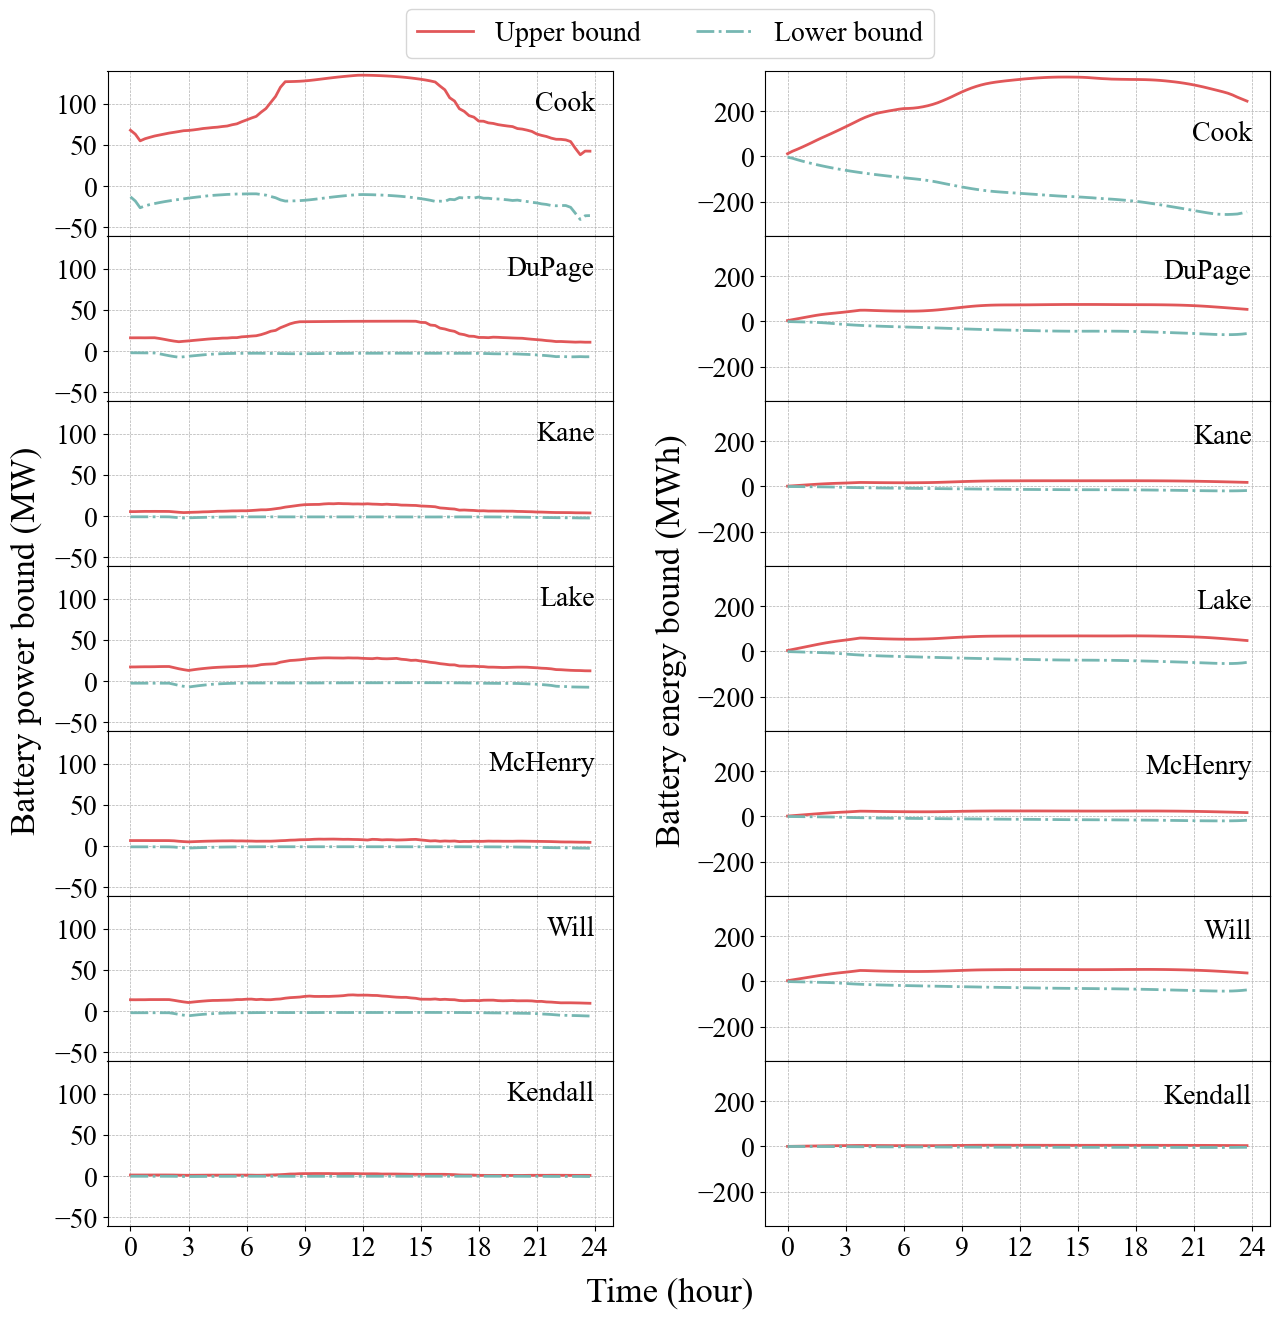

In [5]:
import matplotlib.pyplot as plt
import numpy as np

countyName = ['Cook', 'DuPage', 'Kane', 'Lake', 'McHenry', 'Will', 'Kendall']

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 生成示例数据

fig, axs = plt.subplots(N_n, 2, figsize=(15, 15), sharex=True, sharey=False)
colors = ['#E15759', '#76B7B2', '#59A14F', '#EDC948']
linestyles = ['-', '-.']  # 实线和虚线

x_axis = np.arange(96)/4
for i in range(N_n):
    axs[i, 0].set_ylim(-60, 140)
    l1, = axs[i, 0].plot(x_axis, data_plot['u_UB'][i], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
    l2, = axs[i, 0].plot(x_axis, data_plot['u_LB'][i], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
    # axs[i, 0].legend(loc='upper right')
    axs[i, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=20)
    axs[i, 0].text(24, 100, f'{countyName[i]}', fontsize=20, ha='right', va='center')  # 添加文字
    axs[i, 0].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
    axs[i, 0].set_yticks(np.arange(-50, 150, 50))  # 设置y轴刻度间隔


    axs[i, 1].set_ylim(-350, 380)
    axs[i, 1].plot(x_axis, data_plot['E_UB'][i], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
    axs[i, 1].plot(x_axis, data_plot['E_LB'][i], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
    # axs[i, 1].legend(loc='upper right')
    axs[i, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=20)
    if countyName[i] == 'Cook':
        axs[i, 1].text(24, 100, f'{countyName[i]}', fontsize=20, ha='right', va='center')  # 添加文字
    else:
        axs[i, 1].text(24, 220, f'{countyName[i]}', fontsize=20, ha='right', va='center')

    axs[i, 1].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
    axs[i, 1].set_yticks(np.arange(-200, 400, 200))  # 设置y轴刻度间隔
    # axs[i, 2].plot(x_axis, data_plot['f_UB'][i], label='Series 1')
    # axs[i, 2].plot(x_axis, data_plot['f_LB'][i], label='Series 2')
    # axs[i, 2].legend(loc='upper right')
    # axs[i, 2].grid(True)

# 调整子图之间的间距
fig.subplots_adjust(hspace=0, wspace=0.3)

# 共享x轴标签和y轴标签
fig.text(0.5, 0.06, 'Time (hour)', ha='center', fontsize=25)
fig.text(0.06, 0.5, 'Battery power bound (MW)', va='center', rotation='vertical', fontsize=25)
fig.text(0.49, 0.5, 'Battery energy bound (MWh)', va='center', rotation='vertical', fontsize=25)
fig.legend([l1, l2], ['Upper bound', 'Lower bound'], loc='upper center', bbox_to_anchor=(0.5, 0.93), ncol=2, fontsize=20)

# plt.savefig('figures/Chicago2017_RealCapacity/batteryCapacity_Chicago.pdf', format='pdf', bbox_inches='tight')
plt.show()


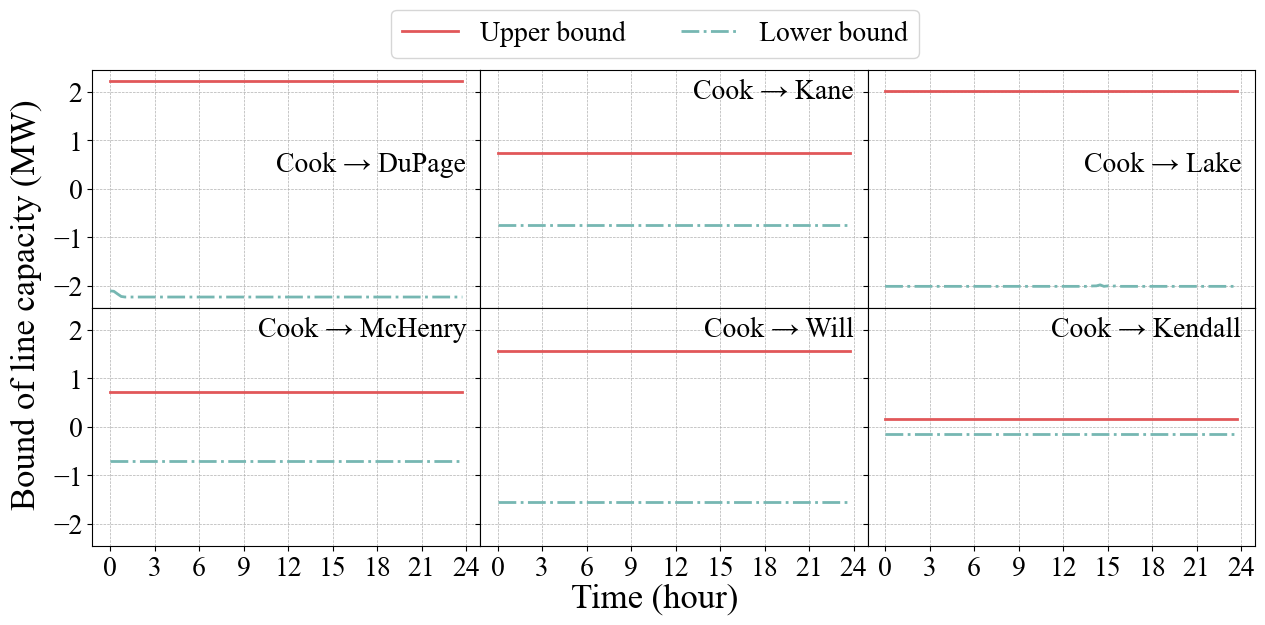

In [6]:
import matplotlib.pyplot as plt
import numpy as np

lineKeys = [
    ('Cook', 'DuPage'), ('Cook', 'Kane'), ('Cook', 'Lake'), ('Cook', 'McHenry'), ('Cook', 'Will'), ('Cook', 'Kendall'),
]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 生成示例数据

fig, axs = plt.subplots(2, 3, figsize=(15, 6.18), sharex=True, sharey=True)
colors = ['#E15759', '#76B7B2', '#59A14F', '#EDC948']
linestyles = ['-', '-.']  # 实线和虚线

x_axis = np.arange(96)/4
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        # axs[i, 0].set_ylim(-40, 70)
        l1, = axs[i, j].plot(x_axis, data_plot['f_UB'][index], label='Upper bound', color=colors[0], linestyle=linestyles[0], linewidth=2)
        l2, = axs[i, j].plot(x_axis, data_plot['f_LB'][index], label='Lower bound', color=colors[1], linestyle=linestyles[1], linewidth=2)
        # axs[i, 0].legend(loc='upper right')
        axs[i, j].grid(True, which='both', linestyle='--', linewidth=0.5)
        axs[i, j].tick_params(axis='both', which='major', labelsize=20)
        if lineKeys[index] in [('Cook', 'DuPage'), ('Cook', 'Lake')]:
            axs[i, j].text(24, 0.5, f'{lineKeys[index][0]} → {lineKeys[index][1]}', fontsize=20, ha='right', va='center')
        else:
            axs[i, j].text(24, 2, f'{lineKeys[index][0]} → {lineKeys[index][1]}', fontsize=20, ha='right', va='center')  # 添加文字
        axs[i, j].set_xticks(np.arange(0, 25, 3))  # 设置x轴刻度间隔
        axs[i, 0].set_yticks(np.arange(-2, 3, 1))  # 设置y轴刻度间隔

fig.subplots_adjust(hspace=0, wspace=0)
# 共享x轴标签和y轴标签
fig.text(0.5, 0.01, 'Time (hour)', ha='center', fontsize=25)
fig.text(0.07, 0.5, 'Bound of line capacity (MW)', va='center', rotation='vertical', fontsize=25)
fig.legend([l1, l2], ['Upper bound', 'Lower bound'], loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=20)

# plt.savefig('figures/Chicago2017_RealCapacity/lineCapacity_Chicago.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [7]:
# 读取GeoJSON文件

# countyIndices = [31, 43, 89, 97, 111, 197, 93]

# order is correct

countyName = ['Cook', 'DuPage', 'Kane', 'Lake', 'McHenry', 'Will', 'Kendall']

counties = {
    'Cook': 'geo/Cook.geojson',
    'DuPage': 'geo/DuPage.geojson',
    'Kane': 'geo/Kane.geojson',
    'Lake': 'geo/Lake.geojson',
    'McHenry': 'geo/McHenry.geojson',
    'Will': 'geo/Will.geojson',
    'Kendall': 'geo/Kendall.geojson',
}


def flexibilityValue(u_UB_plot, u_LB_plot, E_UB_plot, E_LB_plot, f_UB_plot, f_LB_plot):
    batteryEnergyCapacity = E_UB_plot - E_LB_plot
    lineCapacity = f_UB_plot - f_LB_plot
    circleSize = {}
    circleSize_power = {}
    for n in range(N_n):
        county = countyName[n]
        circleSize[county] = batteryEnergyCapacity[n]
        circleSize_power[county] = u_UB_plot[n] - u_LB_plot[n]

    lineWidth = {}
    lineKeys = [
        ('Cook', 'DuPage'), ('Cook', 'Kane'), ('Cook', 'Lake'), ('Cook', 'McHenry'), ('Cook', 'Will'), ('Cook', 'Kendall'),
    ]
    for l in range(N_line):
        line = lineKeys[l]
        lineWidth[line] = lineCapacity[l]

    batteryPowerPrint = {}
    batteryEnergyPrint = {}
    for n in range(N_n):
        county = countyName[n]
        batteryPowerPrint[county] = f"{u_LB_plot[n]*1000:.1f} MW &le; u &le; {u_UB_plot[n]*1000:.1f} MW"
        batteryEnergyPrint[county] = f"{E_LB_plot[n]*1000:.1f} MWh &le; E &le; {E_UB_plot[n]*1000:.1f} MWh"

    linePowerPrint = {}
    for l in range(N_line):
        line = lineKeys[l]
        linePowerPrint[line] = f"{f_LB_plot[l]*1000:.1f} MW &le; f &le; {f_UB_plot[l]*1000:.1f} MW"

    return circleSize, circleSize_power, lineWidth, batteryPowerPrint, batteryEnergyPrint, linePowerPrint


In [8]:
i = 0
j = 0
r = 0
ratio_pubCharger = ratio_pubCharger_list[r]

u_UB_plot = u_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
u_LB_plot = u_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
E_UB_plot = E_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GWh
E_LB_plot = E_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GWh
f_UB_plot = f_UB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW
f_LB_plot = f_LB_rec[i][ratio_pubCharger][j].mean(axis = 1)/1000 # in GW

circleSize, circleSize_power, lineWidth, batteryPowerPrint, batteryEnergyPrint, linePowerPrint = flexibilityValue(
    u_UB_plot, u_LB_plot, E_UB_plot, E_LB_plot, f_UB_plot, f_LB_plot)

In [9]:
import math

move = {
    'Cook': -0.1, 
    'DuPage': -0.1, 
    'Kane': 0.1, 
    'Lake': 0.1, 
    'McHenry': 0.1, 
    'Will': -0.1, 
    'Kendall': -0.1
    }


def calculate_offset_location(midpoint, angle, offset_distance=10):
    angle_rad = math.radians(angle)
    # Offset direction is perpendicular to the line
    offset_x = midpoint[0] - offset_distance * math.cos(angle_rad)
    offset_y = midpoint[1] - offset_distance * math.sin(angle_rad)
    return [offset_x, offset_y]

In [10]:
# 配色方案
# Nature-inspired color scheme
# circle_color = '#7FC8A9'  # Deep Teal
circle_color = 'grey'  # Deep Teal
line_color = '#5F7A61'  # Deep Red
boundary_color = 'grey'  # Charcoal Gray
fill_color = '#d3e5d6'

angle_test = {('Cook', 'DuPage'): -5.670710105861587,
                ('Cook', 'Kane'): 3.1625080336704983,
                ('Cook', 'Lake'): 54.10598559530239,
                ('Cook', 'McHenry'): 34.007058072630517,
                ('Cook', 'Will'): -59.545555709362475,
                ('Cook', 'Kendall'): -25.286269139043362}


countyNamePosition = {'Cook': [42.0, -87.6],
                        'DuPage': [41.82, -88.2],
                        'Kane': [42, -88.5],
                        'Lake': [42.325357821157084, -87.9],
                        'McHenry': [42.37, -88.6],
                        'Will': [41.37, -87.97867926995366],
                        'Kendall': [41.52, -88.5]}

# batteryPrintPosition = {'Cook': [42.05, -87.6],
#                         'DuPage': [41.82, -88.6],
#                         'Kane': [42, -88.6],
#                         'Lake': [42.325357821157084, -87.9],
#                         'McHenry': [42.37, -88.6],
#                         'Will': [41.37, -87.97867926995366],
#                         'Kendall': [41.52, -88.6]}

# 创建Folium地图
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10, tiles=None)  # 芝加哥的地理位置

# 添加一个透明度为50%的TileLayer
folium.TileLayer('CartoDB Positron', opacity=0.8).add_to(m)
# folium.TileLayer('Stamen Toner').add_to(m)

# 添加县的GeoJSON数据和time_flexibility圆点
county_centers = {}
for county, path in counties.items():
    county_geo = gpd.read_file(path)
    # 获取县的中心点坐标
    county_center = county_geo.geometry.centroid.iloc[0].coords[0]
    
    # 如果是Lake County，移动其圆点
    if county == 'Lake':
        county_center = (county_center[0] - 0.4, county_center[1])  # 向左移动0.1度
    
    county_centers[county] = county_center
    
    value = circleSize_power[county]
    # 使用 folium.Polygon 绘制县边界
    for _, row in county_geo.iterrows():
        geom = row['geometry']
        if isinstance(geom, Polygon):
            coords = [(y, x) for x, y in geom.exterior.coords]
            folium.Polygon(
                locations=coords,
                color=boundary_color,
                weight=0.5,
                fillColor=fill_color,
                fill_opacity=0.5,
            ).add_to(m)
        elif isinstance(geom, MultiPolygon):
            for polygon in geom:
                coords = [(y, x) for x, y in polygon.exterior.coords]
                folium.Polygon(
                    locations=coords,
                    color=boundary_color,
                    weight=0.5,
                    fillColor=fill_color,
                    fill_opacity=0.5,
                ).add_to(m)

    
    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=500,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_color,
        fill=True,
        fill_color=circle_color,
        fill_opacity=1,
        tooltip=f"{county}: {value:.2f}"
    ).add_to(m)


    # 添加县名标签
    folium.Marker(
        countyNamePosition[county],  # folium使用[lat, lon]
        icon=folium.DivIcon(
            html=f"""<div class="label1" style="font-size: 12pt; color: #808080; white-space: nowrap;font-family: 'Times New Roman', Times, serif;">{county}</div>"""
        )
    ).add_to(m)

# 添加代表space_flexibility的线条
for (county1, county2), value in lineWidth.items():
    county1_center = county_centers[county1]
    county2_center = county_centers[county2]
    
    folium.PolyLine(
        locations=[[county1_center[1], county1_center[0]], [county2_center[1], county2_center[0]]],  # folium使用[lat, lon]
        color=line_color,
        opacity=0.7,
        weight=value * 2000,  # 线条宽度根据space_flexibility调整
        tooltip=f"{county1} to {county2}: {value:.2f}"
    ).add_to(m)


    # 计算线条中点坐标
    tt = 0.1
    midpoint = [(county1_center[1] * tt + county2_center[1] * (1-tt)), (county1_center[0] * tt + county2_center[0] * (1-tt))]
    
    # 计算旋转角度
    # angle = degrees(atan2(county2_center[1] - county1_center[1], -county2_center[0] + county1_center[0]))
    angle = angle_test[(county1, county2)]
    # print ((county1, county2), angle)

    offset_location = calculate_offset_location(midpoint, angle, 0.03)
    if county2 == 'Will':
        offset_location = calculate_offset_location(midpoint, angle, 0.05)


    # 添加线条标签并使其平行于线条且居中对齐
    folium.map.Marker(
        location=offset_location,
        icon=folium.DivIcon(
            html=f"""<div class="label2" style="font-size: 12pt; color: #4E6350; white-space: nowrap; font-family: 'Times New Roman', Times, serif; transform: translate(-50%, -48%) rotate({angle}deg); transform-origin: center; padding: 100px;">{linePowerPrint[(county1, county2)]}</div>"""
        )
    ).add_to(m)
# m.save(f'figure_html/Chicago2017/virtual_lines_map_real.html')

m

/var/folders/8y/mnspt2ds2h71ybzd2y7_62hc0000gp/T/ipykernel_47310/3718391287.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county_center = county_geo.geometry.centroid.iloc[0].coords[0]


In [11]:
# 配色方案
# Nature-inspired color scheme
circle_color = '#7FC8A9'  # Deep Teal
circle_power_color = '#a68a64'  # Deep Teal
boundary_color = 'grey'  # Charcoal Gray
fill_color = '#d3e5d6'

countyNamePosition = {'Cook': [41.7, -87.7],
                      'DuPage': [41.95, -88.1],
                      'Kane': [41.85, -88.5],
                      'Lake': [42.25, -87.9],
                      'McHenry': [42.25, -88.6],
                      'Will': [41.57, -87.97867926995366],
                      'Kendall': [41.67, -88.5]}

batteryPrintPosition = {'Cook': [42.05, -87.8],
                        'DuPage': [41.75, -88.3],
                        'Kane': [42.05, -88.55],
                        'Lake': [42.3, -87.9],
                        'McHenry': [42.37, -88.6],
                        'Will': [41.3, -88.1],
                        'Kendall': [41.5, -88.6]}

# 创建Folium地图
m_battery = folium.Map(location=[41.8781, -87.6298], zoom_start=10, tiles=None)  # 芝加哥的地理位置

# 添加一个透明度为80%的TileLayer
folium.TileLayer('CartoDB Positron', opacity=0.8).add_to(m_battery)

# 添加县的GeoJSON数据和time_flexibility圆点
county_centers = {}
for county, path in counties.items():
    county_geo = gpd.read_file(path)
    # 获取县的中心点坐标
    county_center = county_geo.geometry.centroid.iloc[0].coords[0]
    
    # 如果是Lake County，移动其圆点
    if county == 'Lake':
        county_center = (county_center[0] - 0.4, county_center[1])  # 向左移动0.1度
    
    county_centers[county] = county_center
    
    value_energy = circleSize[county]
    value_power = circleSize_power[county]
    # 使用 folium.Polygon 绘制县边界
    for _, row in county_geo.iterrows():
        geom = row['geometry']
        if isinstance(geom, Polygon):
            coords = [(y, x) for x, y in geom.exterior.coords]
            folium.Polygon(
                locations=coords,
                color=boundary_color,
                weight=0.5,
                fillColor=fill_color,
                fill_opacity=0.5,
            ).add_to(m_battery)
        elif isinstance(geom, MultiPolygon):
            for polygon in geom:
                coords = [(y, x) for x, y in polygon.exterior.coords]
                folium.Polygon(
                    locations=coords,
                    color=boundary_color,
                    weight=0.5,
                    fillColor=fill_color,
                    fill_opacity=0.5,
                ).add_to(m_battery)

    radius_energy = value_energy * 40000
    radius_power = value_power * 100000
    midpoint_distance = 0.5 * (radius_energy + radius_power)/1e5
    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=radius_energy,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_color,
        opacity=0.9,
        fill=True,
        fill_color=circle_color,
        fill_opacity=0.3,
        tooltip=f"{county}: {value_energy:.2f}"
    ).add_to(m_battery)

    folium.Circle(
        location=[county_center[1], county_center[0]],  # folium使用[lat, lon]
        radius=radius_power,  # 圆圈半径根据time_flexibility调整，单位是米
        color=circle_power_color,
        opacity=0.5,
        fill=True,
        fill_color=circle_power_color,
        fill_opacity=0.3,
        tooltip=f"{county}: {value_power:.2f}"
    ).add_to(m_battery)

    # 添加县名标签
    folium.Marker(
        countyNamePosition[county],  # folium使用[lat, lon]
        icon=folium.DivIcon(
            html=f"""<div class="label1" style="font-size: 12pt; color: grey; white-space: nowrap;font-family: 'Times New Roman', Times, serif;">{county}</div>"""
        )
    ).add_to(m_battery)
    
    # 添加圆点标签
    folium.map.Marker(
        batteryPrintPosition[county],
        icon=folium.DivIcon(
            html=f"""<div class="label3" style="font-size: 12pt; color : #a98467; white-space: nowrap; font-family: 'Times New Roman', Times, serif;text-align: center; transform: translate(-50%, -50%);">{batteryPowerPrint[county]}</div>"""
        )
    ).add_to(m_battery)

    folium.map.Marker(
        location=[batteryPrintPosition[county][0] + 0.03, batteryPrintPosition[county][1]],
        icon=folium.DivIcon(
            html=f"""<div class="label4" style="font-size: 12pt; color : #4c956c; white-space: nowrap; font-family: 'Times New Roman', Times, serif;text-align: center; transform: translate(-50%, -50%);">{batteryEnergyPrint[county]}</div>"""
        )
    ).add_to(m_battery)


# 添加表示图例的圆圈位置
legend_location = [41.5, -87.2]  # 图例的中心位置，可以根据需要调整

# 添加白框背景
folium.Rectangle(
    bounds=[[legend_location[0] - 0.1, legend_location[1] - 0.2], 
            [legend_location[0] + 0.1, legend_location[1] + 0.2]],
    color='white',
    fill=True,
    fill_color='white',
    fill_opacity=0.8
).add_to(m_battery)

# 添加Energy Circle图例
folium.Circle(
    location=[legend_location[0] - 0.05, legend_location[1]-0.1],  # 图例圆圈的位置
    radius=0.1 * 20000,  # value_energy=1000时的圆圈半径
    color=circle_color,
    opacity=0.9,
    fill=True,
    fill_color=circle_color,
    fill_opacity=0.3
).add_to(m_battery)

# 添加Power Circle图例
folium.Circle(
    location=[legend_location[0] + 0.05, legend_location[1]-0.1],  # 图例圆圈的位置
    radius=0.1 * 20000,  # value_power=10000时的圆圈半径
    color=circle_power_color,
    opacity=0.5,
    fill=True,
    fill_color=circle_power_color,
    fill_opacity=0.3
).add_to(m_battery)

# 添加文字说明在圆的右方
folium.Marker(
    location=[legend_location[0] - 0.04, legend_location[1] -0.05],  # 文字位置，调整使其在圆的右方
    icon=folium.DivIcon(
        html='<div style="font-size: 12pt; font-family: \'Times New Roman\', Times, serif; color: black; background-color: white; padding: 2px; white-space: nowrap;">E=50 MWh</div>'
    )
).add_to(m_battery)

folium.Marker(
    location=[legend_location[0] + 0.06, legend_location[1] -0.05],  # 文字位置，调整使其在圆的右方
    icon=folium.DivIcon(
        html='<div style="font-size: 12pt; font-family: \'Times New Roman\', Times, serif; color: black; background-color: white; padding: 2px; white-space: nowrap; ">P=20 MW</div>'
    )
).add_to(m_battery)


# # 保存地图
# m_battery.save(f'figure_html/Chicago2017/virtual_battery_map_real_legend.html')
m_battery

/var/folders/8y/mnspt2ds2h71ybzd2y7_62hc0000gp/T/ipykernel_47310/1782312403.py:35: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county_center = county_geo.geometry.centroid.iloc[0].coords[0]


In [ ]:
parkingHours_Chicago = pd.read_csv('Results_plot/Chicago2017/parkHours_county.csv', index_col = 0)

parkingHours_Chicago['County'] = parkingHours_Chicago.index.str.replace('\n', ' ')
parkingHours_Chicago['Matched Value'] = parkingHours_Chicago['County'].map(circleSize)
parkingHours_Chicago['totalParkHours'] = parkingHours_Chicago['home'] + parkingHours_Chicago['nonhome']

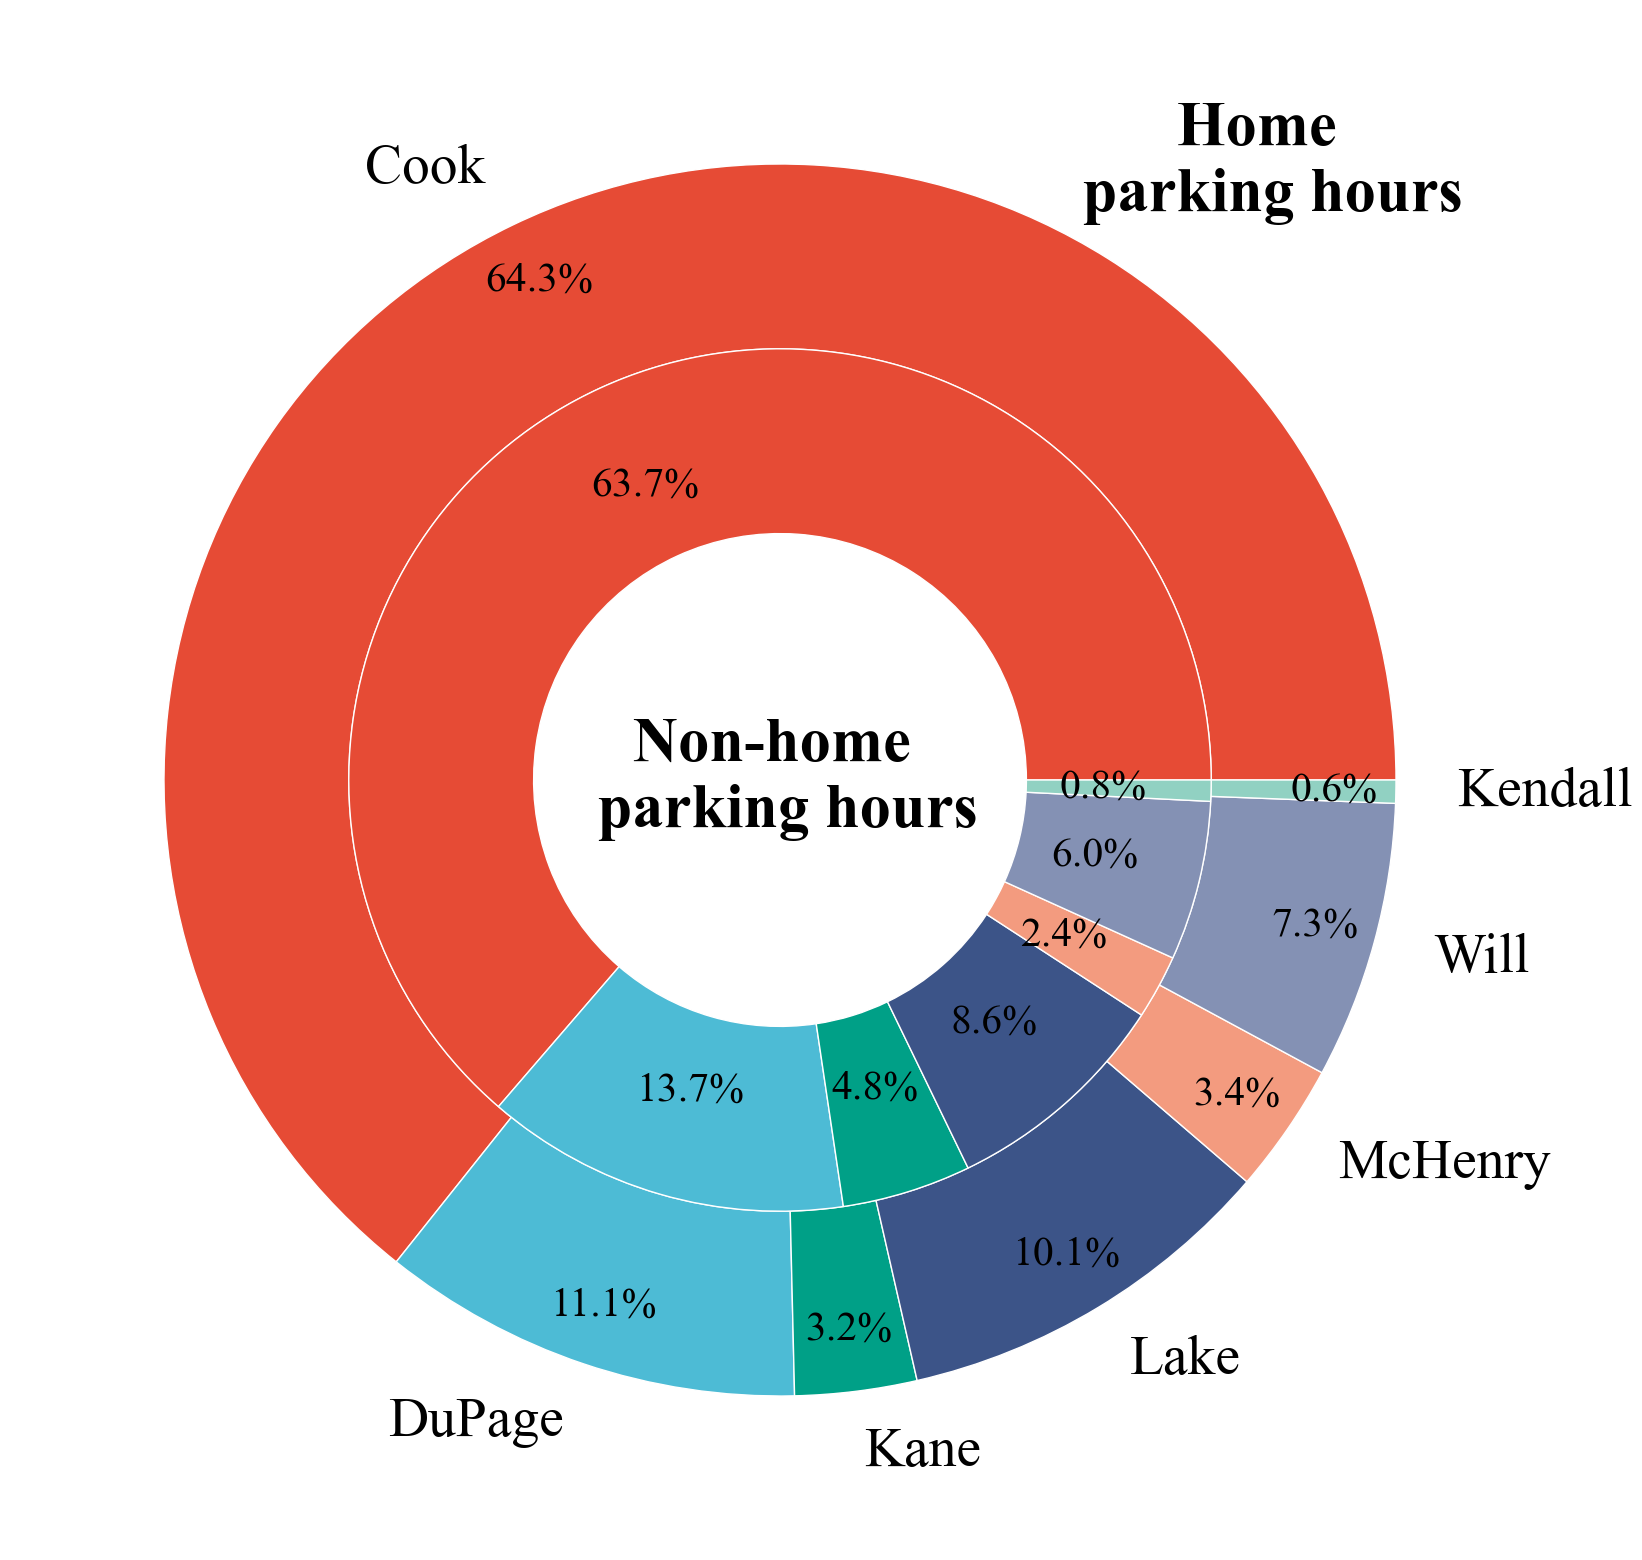

In [14]:
df = parkingHours_Chicago

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# 分别计算 home 和 nonhome 的百分比
df['home_pct'] = df['home'] / df['home'].sum() * 100
df['nonhome_pct'] = df['nonhome'] / df['nonhome'].sum() * 100

# 设置颜色列表
colors = [
    '#E64B35',  # 红色
    '#4DBBD5',  # 蓝色
    '#00A087',  # 绿色
    '#3C5488',  # 深蓝色
    '#F39B7F',  # 浅橙色
    '#8491B4',  # 灰蓝色
    '#91D1C2'   # 浅绿色
]

# 设置图形
fig, ax = plt.subplots(figsize=(20, 20))

# 大圆环表示 home 数据的百分比
wedges, texts, autotexts = ax.pie(df['home_pct'], radius=1, labels=df.index, labeldistance=1.1, colors=colors[:len(df)], wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.9, autopct='%1.1f%%')

# 小圆环表示 nonhome 数据的百分比
wedges2, texts2, autotexts2 = ax.pie(df['nonhome_pct'], radius=0.7, colors=colors[:len(df)], wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.75, autopct='%1.1f%%')

# 设置百分比标签的字体大小
for autotext in autotexts + autotexts2:
    autotext.set_fontsize(30)

# 设置县名称标签的字体大小
for text in texts + texts2:
    text.set_fontsize(40)

# # 添加额外的标签表示内环和外环分别是 home 和 nonhome
plt.text(0.8, 1, 'Home  \n parking hours ', ha='center', va='center', fontsize=45, fontfamily='Times New Roman', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none'))
plt.text(0, 0, 'Non-home \n parking hours', ha='center', va='center', fontsize=45, fontfamily='Times New Roman', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none'))


# 设置标题
# ax.set_title('Home and Nonhome Data by County', fontsize=15, fontfamily='Times New Roman')

# plt.savefig('figures/Chicago2017_RealCapacity/ParkingHours_Chicago.pdf', format='pdf')

# 显示图形
plt.show()
